In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fertilizer_data_path = '/content/drive/MyDrive/data/Fertilizer Prediction.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [3]:
merge_fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [34]:
merge_fert.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [35]:
merge_fert['Crop_Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

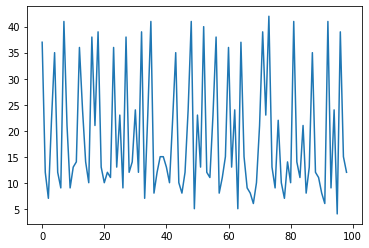

In [36]:
plt.plot(merge_fert["Nitrogen"])

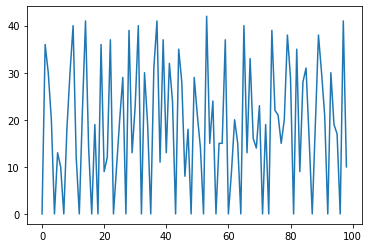

In [37]:
plt.plot(merge_fert["Phosphorous"])

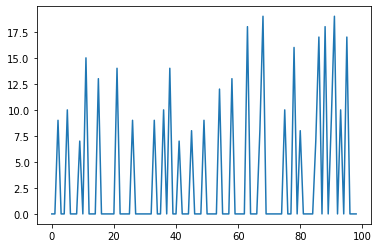

In [38]:
plt.plot(merge_fert["Potassium"])

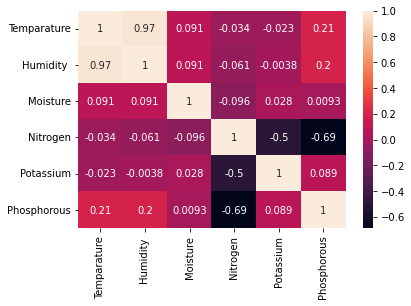

In [39]:
sns.heatmap(merge_fert.corr(),annot=True)

In [40]:
merge_crop1 = pd.read_csv('/content/drive/MyDrive/data/ferti_new.csv')
reco_fert = merge_fert
print(merge_crop1)

   unnamed  Temparature  Humidity   Moisture Soil Type  Crop_Type  Nitrogen  \
0        0           26         52        38     Sandy      maize        37   
1        1           29         52        45     Loamy  sugarcane        12   
2        2           34         65        62     Black     cotton         7   
3        3           32         62        34       Red    tobacco        22   
4        7           33         64        50     Loamy      wheat        41   

   Potassium  Phosphorous Fertilizer_Name  
0          0            0            Urea  
1          0           36             DAP  
2          9           30        14-35-14  
3          0           20           28-28  
4          0            0            Urea  


In [41]:
import pandas as pd
merge_crop=merge_crop1.rename(columns={'Crop Type':'Crop_Type'})
print(merge_crop)

   unnamed  Temparature  Humidity   Moisture Soil Type  Crop_Type  Nitrogen  \
0        0           26         52        38     Sandy      maize        37   
1        1           29         52        45     Loamy  sugarcane        12   
2        2           34         65        62     Black     cotton         7   
3        3           32         62        34       Red    tobacco        22   
4        7           33         64        50     Loamy      wheat        41   

   Potassium  Phosphorous Fertilizer_Name  
0          0            0            Urea  
1          0           36             DAP  
2          9           30        14-35-14  
3          0           20           28-28  
4          0            0            Urea  


In [ ]:
import random
temp = pd.DataFrame(columns = ['Nitrogen','Phosphorous','Potassium'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.Crop_Type.iloc[i]
    #print(crop)
    N = reco_fert[reco_fert['Crop_Type'] == crop]["Nitrogen"].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop_Type'] == crop]["Phosphorous"].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop_Type'] == crop]["Potassium"].iloc[0] + random.randint(-5,5)
    d = {"Nitrogen":N,"Phosphorous":P,"Potassium":K}
    #print(d)
    temp = temp.append(d,ignore_index = True)

In [47]:
temp

,Nitrogen,Potassium,Phosphorous


In [48]:
merge_crop['Nitrogen'] = temp['Nitrogen']
merge_crop['Phosphorous'] = temp['Phosphorous']
merge_crop['Potassium'] = temp['Potassium']

In [49]:
merge_crop

,unnamed,Temparature,Humidity,Moisture,Soil Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,0,26,52,38,Sandy,maize,NaN,NaN,NaN,Urea
1,1,29,52,45,Loamy,sugarcane,NaN,NaN,NaN,DAP
2,2,34,65,62,Black,cotton,NaN,NaN,NaN,14-35-14
3,3,32,62,34,Red,tobacco,NaN,NaN,NaN,28-28
4,7,33,64,50,Loamy,wheat,NaN,NaN,NaN,Urea


In [56]:
merge_crop = merge_crop[[ 'Nitrogen', 'Phosphorous', 'Potassium','Temparature', 'Moisture', 'Crop_Type']]

In [57]:
merge_crop.to_csv("/content/drive/MyDrive/data/Crop_recommendation.csv",index=False)

In [58]:
df = pd.read_csv('/content/drive/MyDrive/data/Crop_recommendation.csv')
df.head()

,Nitrogen,Phosphorous,Potassium,Temparature,Moisture,Crop_Type
0,NaN,NaN,NaN,26,38,maize
1,NaN,NaN,NaN,29,45,sugarcane
2,NaN,NaN,NaN,34,62,cotton
3,NaN,NaN,NaN,32,34,tobacco
4,NaN,NaN,NaN,33,50,wheat


In [59]:
df.shape

(5, 6)